In [1]:
# Load CIFAR-10 data set
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


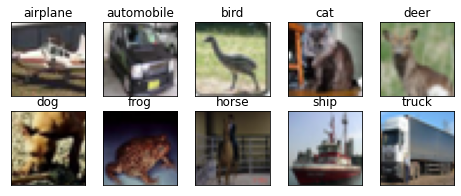

In [2]:
# Show examples from each class
import numpy as np
import matplotlib.pyplot as plt

num_classes = len(np.unique(y_train))
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    rnd_img = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[rnd_img,::], (0, 1, 2))
    plt.imshow(im)
plt.show()

In [3]:
# Data pre-processing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [4]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1,step=len(model_history.history['accuracy'])/10))
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1,step=len(model_history.history['loss'])/10))
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import experimental

def build_model_v1():
    model = Sequential([experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
    experimental.preprocessing.RandomRotation(0.2),
    experimental.preprocessing.RandomZoom(.2),
    experimental.preprocessing.RandomFlip("horizontal")])

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def build_model_v2():
    model = Sequential([experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
    experimental.preprocessing.RandomRotation(0.2),
    experimental.preprocessing.RandomZoom(.2),
    experimental.preprocessing.RandomFlip("horizontal")])

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(16))
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def build_model_v3():
    model = Sequential([experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
    experimental.preprocessing.RandomRotation(0.2),
    experimental.preprocessing.RandomZoom(.2),
    experimental.preprocessing.RandomFlip("horizontal")])

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(512))
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

In [6]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

model = build_model_v1()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation (RandomRotat (None, 32, 32, 3)         0         
_________________________________________________________________
random_zoom (RandomZoom)     (None, 32, 32, 3)         0         
_________________________________________________________________
random_flip (RandomFlip)     (None, 32, 32, 3)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

Epoch 1/40
391/391 [==============================] - 5s 11ms/step - loss: 2.2260 - accuracy: 0.1491 - val_loss: 2.0150 - val_accuracy: 0.2707
Epoch 2/40
391/391 [==============================] - 4s 10ms/step - loss: 2.0455 - accuracy: 0.2463 - val_loss: 1.9432 - val_accuracy: 0.2991
Epoch 3/40
391/391 [==============================] - 4s 10ms/step - loss: 2.0010 - accuracy: 0.2677 - val_loss: 1.9071 - val_accuracy: 0.3128
Epoch 4/40
391/391 [==============================] - 4s 10ms/step - loss: 1.9708 - accuracy: 0.2852 - val_loss: 1.8719 - val_accuracy: 0.3196
Epoch 5/40
391/391 [==============================] - 4s 10ms/step - loss: 1.9494 - accuracy: 0.2916 - val_loss: 1.8409 - val_accuracy: 0.3408
Epoch 6/40
391/391 [==============================] - 4s 10ms/step - loss: 1.9250 - accuracy: 0.3058 - val_loss: 1.8180 - val_accuracy: 0.3487
Epoch 7/40
391/391 [==============================] - 4s 10ms/step - loss: 1.9219 - accuracy: 0.3015 - val_loss: 1.8041 - val_accuracy: 0.3523

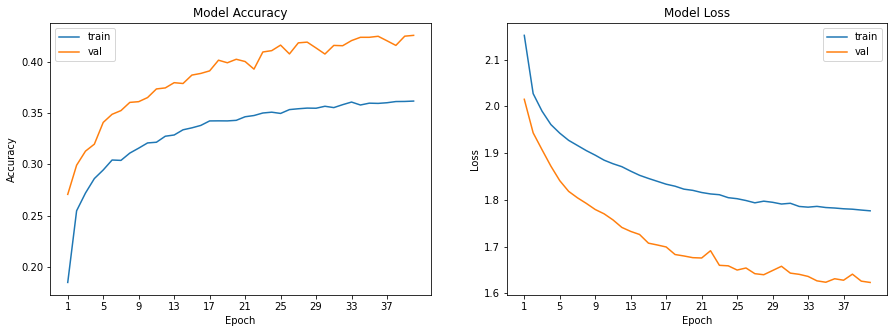

Training MLP took 165.18742299079895 seconds


In [7]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

In [8]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

model = build_model_v2()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation_1 (RandomRot (None, 32, 32, 3)         0         
_________________________________________________________________
random_zoom_1 (RandomZoom)   (None, 32, 32, 3)         0         
_________________________________________________________________
random_flip_1 (RandomFlip)   (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               393344    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

Epoch 1/40
391/391 [==============================] - 5s 11ms/step - loss: 2.2668 - accuracy: 0.1245 - val_loss: 2.0835 - val_accuracy: 0.1897
Epoch 2/40
391/391 [==============================] - 4s 10ms/step - loss: 2.1227 - accuracy: 0.1735 - val_loss: 2.0659 - val_accuracy: 0.1949
Epoch 3/40
391/391 [==============================] - 4s 10ms/step - loss: 2.1070 - accuracy: 0.1844 - val_loss: 2.0493 - val_accuracy: 0.1994
Epoch 4/40
391/391 [==============================] - 4s 11ms/step - loss: 2.0870 - accuracy: 0.1961 - val_loss: 2.0034 - val_accuracy: 0.2442
Epoch 5/40
391/391 [==============================] - 4s 11ms/step - loss: 2.0594 - accuracy: 0.2106 - val_loss: 1.9808 - val_accuracy: 0.2530
Epoch 6/40
391/391 [==============================] - 4s 10ms/step - loss: 2.0470 - accuracy: 0.2210 - val_loss: 1.9594 - val_accuracy: 0.2591
Epoch 7/40
391/391 [==============================] - 4s 10ms/step - loss: 2.0421 - accuracy: 0.2257 - val_loss: 1.9510 - val_accuracy: 0.2662

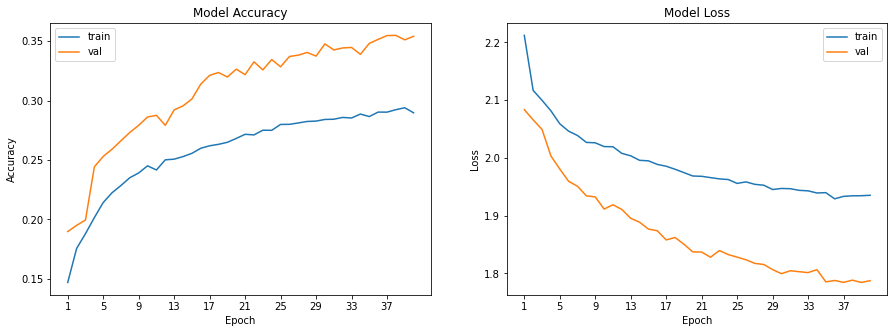

Training MLP took 162.2593276500702 seconds


In [9]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

In [10]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

model = build_model_v3()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation_2 (RandomRot (None, 32, 32, 3)         0         
_________________________________________________________________
random_zoom_2 (RandomZoom)   (None, 32, 32, 3)         0         
_________________________________________________________________
random_flip_2 (RandomFlip)   (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)             

Epoch 1/40
391/391 [==============================] - 11s 26ms/step - loss: 2.2218 - accuracy: 0.1394 - val_loss: 1.9752 - val_accuracy: 0.2612
Epoch 2/40
391/391 [==============================] - 10s 25ms/step - loss: 2.0454 - accuracy: 0.2305 - val_loss: 1.9319 - val_accuracy: 0.2873
Epoch 3/40
391/391 [==============================] - 10s 25ms/step - loss: 1.9976 - accuracy: 0.2671 - val_loss: 1.8901 - val_accuracy: 0.3158
Epoch 4/40
391/391 [==============================] - 10s 25ms/step - loss: 1.9664 - accuracy: 0.2821 - val_loss: 1.8367 - val_accuracy: 0.3341
Epoch 5/40
391/391 [==============================] - 10s 25ms/step - loss: 1.9381 - accuracy: 0.2980 - val_loss: 1.8371 - val_accuracy: 0.3308
Epoch 6/40
391/391 [==============================] - 10s 25ms/step - loss: 1.9175 - accuracy: 0.3074 - val_loss: 1.8217 - val_accuracy: 0.3503
Epoch 7/40
391/391 [==============================] - 10s 25ms/step - loss: 1.9104 - accuracy: 0.3090 - val_loss: 1.7858 - val_accuracy:

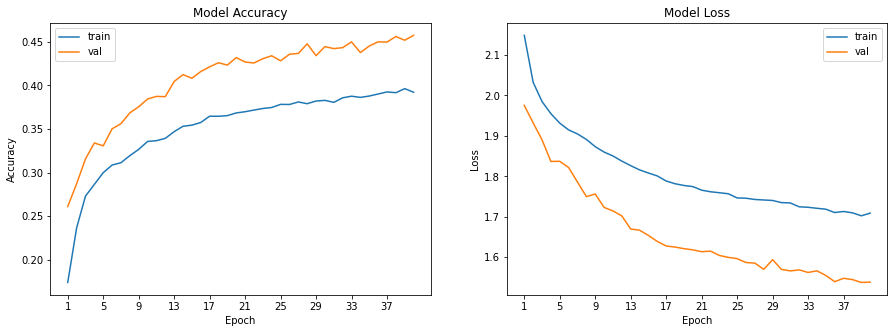

Training MLP took 413.6311500072479 seconds


In [11]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

Definición de una red convolucional multicapa

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Input, Dropout, Conv2D, MaxPooling2D

def create_block(block_input, n_filtros):
    x = block_input
    for i in range(2):
        x = Conv2D(n_filtros, kernel_size=(3,3), padding="same")(x)
        x = Activation("relu")(x)
    return x

def build_conv(include_dropout = True): # De https://www.kaggle.com/mahtabshaan/autoencoder-as-feature-extractor-cifar10
    net_input = Input((32,32,3))

    block1 = create_block(net_input, 32)
    x = MaxPooling2D(pool_size=(2, 2))(block1)
    if include_dropout:
        x = Dropout(0.3)(x)
        
    block2 = create_block(x, 64)
    x = MaxPooling2D(pool_size=(2, 2))(block2)
    if include_dropout:
        x = Dropout(0.3)(x)

    block3 = create_block(x, 128)
    x = MaxPooling2D(pool_size=(2, 2))(block3)
    if include_dropout:
        x = Dropout(0.3)(x)

    x = Flatten()(x)
    output = Dense(10, activation='softmax')(x)
    return Model(net_input, output)


In [14]:
# Convolutional Neural Network (CNN)
# Here you are allowed to use convolutional layers
# You may use also any regularizacion (see class slides)

import keras.backend as K

model = build_conv()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 32)        0     

Epoch 1/20
98/98 [==============================] - 126s 1s/step - loss: 2.1014 - accuracy: 0.2072 - val_loss: 1.6012 - val_accuracy: 0.4212
Epoch 2/20
98/98 [==============================] - 123s 1s/step - loss: 1.5956 - accuracy: 0.4148 - val_loss: 1.3372 - val_accuracy: 0.5100
Epoch 3/20
98/98 [==============================] - 125s 1s/step - loss: 1.3514 - accuracy: 0.5119 - val_loss: 1.1459 - val_accuracy: 0.5894
Epoch 4/20
98/98 [==============================] - 124s 1s/step - loss: 1.1760 - accuracy: 0.5796 - val_loss: 1.0582 - val_accuracy: 0.6237
Epoch 5/20
98/98 [==============================] - 128s 1s/step - loss: 1.0411 - accuracy: 0.6300 - val_loss: 0.9792 - val_accuracy: 0.6517
Epoch 6/20
98/98 [==============================] - 128s 1s/step - loss: 0.9663 - accuracy: 0.6609 - val_loss: 0.8895 - val_accuracy: 0.6884
Epoch 7/20
98/98 [==============================] - 130s 1s/step - loss: 0.9068 - accuracy: 0.6813 - val_loss: 0.8645 - val_accuracy: 0.6982
Epoch 8/20
98

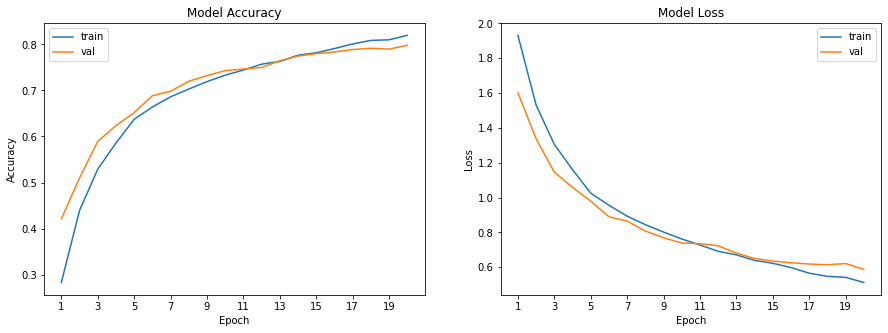

Training MLP took 2643.802327632904 seconds


In [15]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=512, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")